# Part I - Dataset Exploration: Product Sales Analysis

## **By: Jameel Abu-Baker**


## Dataset Description: Product Sales Data

This dataset contains 15,000 records of customer transactions, sales methods, and engagement with the company. It provides insights into sales performance, customer behavior, and regional distribution, enabling analysis of key trends and relationships within the business.

---

| **Column Name**      | **Details**                                                                                           |
|----------------------|-------------------------------------------------------------------------------------------------------|
| **week**             | Week sale was made, counted as weeks since product launch.                                            |
| **sales_method**     | Character, which of the three sales methods were used for that customer.                              |
| **customer_id**      | Character, unique identifier for the customer.                                                       |
| **nb_sold**          | Numeric, number of new products sold.                                                                 |
| **revenue**          | Numeric, revenue from the sales, rounded to 2 decimal places.                                         |
| **years_as_customer**| Numeric, number of years customer has been buying from us (company founded in 1984).                  |
| **nb_site_visits**   | Numeric, number of times the customer has visited our website in the last 6 months.                   |
| **state**            | Character, location of the customer i.e. where orders are shipped.                                    |

---


## Features Supporting Revenue Investigation

In investigating **revenue** as the primary feature of interest, the following features will provide essential insights:

1. **Number of Products Sold (`nb_sold`)**: This feature directly impacts revenue generation, as higher sales volumes typically lead to higher revenue. Analyzing this will help establish the strength of this relationship.

2. **Sales Method (`sales_method`)**: Since different sales methods may have varying effectiveness in generating revenue, examining this variable will help identify which sales strategies are most lucrative.

3. **Years as Customer (`years_as_customer`)**: Customer loyalty and purchasing behavior may evolve over time. This feature will help identify if long-term customers contribute more consistently to revenue compared to newer customers.

4. **Number of Site Visits (`nb_site_visits`)**: Frequent site visits could indicate higher levels of customer engagement, which may correlate with increased sales and revenue. This feature will help assess the impact of engagement on purchasing behavior.

By analyzing these features, we can better understand the key drivers behind revenue generation and identify areas for potential optimization in sales strategies.

# Data Validation

### Import Libraries for Data Analysis

Loading the following libraries for data handling and visualization:

- **Pandas**: Data manipulation
- **NumPy**: Numerical computations
- **Matplotlib** & **Seaborn**: Visualization

Now, we can begin our data exploration.

In [1]:
# Importing required libraries and getting overview to start cleaning

import pandas as pd
import numpy as np
from data_visualization_functions import *


## **Product Sales Dataset Overview**

## 1. **Dataset Overview**
   We’ll start by exploring our product sales data, focusing on sales methods, customer metrics, and regional patterns. By    beginning with a general overview, we set the stage for a deeper exploration into sales performance and customer behaviors.


In [2]:
# Load the dataset
product_sales = pd.read_csv('product_sales.csv')

# Preview the dataframe
product_sales

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [3]:
# Check how many total rows and columns
product_sales.shape

(15000, 8)

---

### Initial Observations

From our initial review, we see that the dataset offers valuable insights into product sales, including sales methods, customer engagement, and regional performance. The dataset consists of 15,000 rows and 8 columns. We’ve identified missing values specifically in the revenue column. Addressing this issue will be essential before diving deeper into the analysis.

### Findings So Far

**Rich Data**: The dataset provides a comprehensive view of sales performance, customer metrics, and geographic distribution, forming a solid basis for our analysis.

---

## 2- Understanding the Data

To effectively analyze our dataset, we first need to understand its structure and completeness. This involves identifying any columns with missing values and evaluating the overall data quality. We’ll start by examining these aspects to ensure our analysis is built on a solid foundation.

In [4]:
# Display information about the dataset
print("DataFrame summary:")

product_sales.info()

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


---

### Insights from the Data

We found several key insights:

1. **Dataset Size and Structure**: The dataset comprises 15,000 rows and 8 columns, offering a comprehensive view of our product sales. The columns include a mix of data types: integers, floats, and objects.

2. **Completeness of Data**:
    - The columns `week`, `sales_method`, `customer_id`, `nb_sold`, `years_as_customer`, `nb_site_visits`, and `state` are complete with no missing values.
    - The `revenue` column contains missing values:
        - `revenue`: 13,926 non-null entries, indicating missing values.

3. **Memory Usage**: The dataset uses approximately 937.6 KB of memory, which is manageable for our analysis.

4. **Data Cleaning**: The presence of missing values in the `revenue` column highlights the need for data cleaning before we proceed with further analysis. Addressing these missing values will ensure the accuracy and reliability of our insights.

By understanding the completeness and structure of the dataset, we can effectively plan our data cleaning and preprocessing steps to ensure a robust analysis of product sales.

---

## 3- Statistical Summary of the Product Sales Dataset

Building on our understanding of the dataset’s structure, we now examine the statistical summary. This will offer insights into key metrics such as sales quantities, revenue distributions, and customer behaviors, helping us identify important trends and patterns.

In [5]:
# Describe the dataset
product_sales.describe(include='all')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.000000,15000,15000,15000.000000,13926.000000,15000.000000,15000.000000,15000
unique,NaN,5,15000,NaN,NaN,NaN,NaN,50
top,NaN,Email,2e72d641-95ac-497b-bbf8-4861764a7097,NaN,NaN,NaN,NaN,California
freq,NaN,7456,1,NaN,NaN,NaN,NaN,1872
mean,3.098267,NaN,NaN,10.084667,93.934943,4.965933,24.990867,NaN
std,1.656420,NaN,NaN,1.812213,47.435312,5.044952,3.500914,NaN
min,1.000000,NaN,NaN,7.000000,32.540000,0.000000,12.000000,NaN
25%,2.000000,NaN,NaN,9.000000,52.470000,1.000000,23.000000,NaN
50%,3.000000,NaN,NaN,10.000000,89.500000,3.000000,25.000000,NaN
75%,5.000000,NaN,NaN,11.000000,107.327500,7.000000,27.000000,NaN


---

### Insights from the Statistical Summary

From the statistical summary, we can observe the following key insights:

1. **Sales Metrics**:
    - **`nb_sold`**: Average of approximately 10.08 units sold per transaction, with a range from 7 to 16 units.

    - **`Revenue`**: The average revenue stands at approximately `$93.93`, with individual values fluctuating between `$32.54` and `$238.32`.

2. **Customer and Sales Methods**:
    - **`sales_method`**: 'Email' is the most frequently used sales method, appearing 7,456 times.
    - **`customer_id`**: Each customer ID is unique, with no duplicates.
    
3. **Customer Engagement**:
    - **`nb_site_visits`**: Average of about 25 visits, with a range from 12 to 41 visits.

    - **`years_as_customer`**: The average customer tenure is about 5 years, with values ranging from 0 to 63 years. The upper end of this range includes values beyond the expected maximum of 39 years, highlighting the presence of outliers that need to be addressed for a more accurate analysis.

4. **Geographical Distribution**:
    - **`state`**: 'California' is the most common shipping state, appearing 1,872 times.

These statistics provide a comprehensive view of our sales data, offering valuable insights into sales performance, customer behaviors, and regional distribution.

---

## 4- Checking for and Calculating Missing Data Percentages

To ensure the accuracy and reliability of our analysis, it is crucial to identify and address any missing values in our product sales dataset. We will examine each column for missing values and calculate the percentage of missing data. This will help us gauge the extent of missing values and determine which columns require the most attention during the data cleaning process.

In [6]:
# Define indicators for missing values across different formats (e.g., empty strings, spaces, dashes, 'missing')
missing_value_indicators = ['', ' ', '-', '--', 'missing', 'Missing', 'N/A', 'n/a', None]

# Replace any detected missing value indicators in the product_sales DataFrame with pandas' NA value
product_sales.replace(missing_value_indicators, pd.NA, inplace=True)

# Identify and count the missing values in each column of the product_sales DataFrame
missing_data = product_sales.isna().sum()

# Calculate the total number of rows in the DataFrame for reference
total_rows = product_sales.shape[0]

# Compute the percentage of missing data for each column based on the total number of rows
missing_percentage = (missing_data / total_rows) * 100

# Create a summary DataFrame that combines both the counts and percentages of missing data
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Output the summary table to provide an overview of missing data in the dataset
print("Summary of Missing Values:")
missing_summary

Summary of Missing Values:


,Missing Values,Percentage
week,0,0.00
sales_method,0,0.00
customer_id,0,0.00
nb_sold,0,0.00
revenue,1074,7.16
years_as_customer,0,0.00
nb_site_visits,0,0.00
state,0,0.00


---

### Summary of Missing Values

To ensure our dataset is accurate, we first addressed various ways of indicating missing data. We looked for common indicators such as `['', ' ', '-', '--', 'missing', 'Missing', 'N/A', 'n/a', None]` to make sure no gaps were overlooked.

**Missing Values Overview**:
   - **`revenue`**: This column has 1,074 missing entries, which is about 7.16% of the data.
   - **Other Columns**: We found no missing values in `week`, `sales_method`, `customer_id`, `nb_sold`, `years_as_customer`, `nb_site_visits`, or `state`.

By standardizing how we handle missing data and carefully addressing these gaps, we help ensure that our dataset remains accurate and reliable for analysis.

---

## 5- Imputing Missing Values

To handle the missing values in our dataset, we will use imputation techniques directly on the DataFrame. For the `revenue` column, which contains numerical data, we will fill in the missing values with the mean of the existing entries. This approach helps to maintain the overall trend in the data and ensures our dataset is complete and ready for further analysis.

By applying this imputation method, we aim to enhance the reliability and accuracy of our dataset, enabling us to extract more meaningful insights from the data.

In [7]:
# Fill missing 'revenue' values with the column's mean
product_sales.fillna({'revenue': product_sales['revenue'].mean()}, inplace=True)

# Check if all missing values are handled
print('Number of missing values (null) per column:')
product_sales.isna().sum()

Number of missing values (null) per column:


week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

---

### Verification of Imputation

Now we are sure that the missing values in the `revenue` column have been successfully handled. This ensures our dataset is complete and ready for further analysis. With these adjustments, we can move forward confidently, knowing that our data integrity is maintained and our analysis will be accurate and reliable.

---

## 6- Identifying and Removing Duplicate Rows

To ensure the quality of our dataset, we need to check for and remove any duplicate rows. Duplicates can skew our analysis and lead to inaccurate results. In this step, we will identify any duplicate entries and remove them to maintain the integrity of our data.

In [8]:
# Count duplicate rows
duplicate_count = product_sales.duplicated(keep=False).sum()

# Remove all duplicates in place
product_sales.drop_duplicates(keep=False, inplace=True)

# Print the number of removed duplicates, with a conditional message
if duplicate_count > 0:
    msg = f"Number of duplicate rows removed: {duplicate_count}"
else:
    msg = "No duplicate rows found."
print(msg)

No duplicate rows found.


---

### Duplicate Rows Analysis

After checking for duplicate rows, we found that there were no duplicates in the dataset. This confirms that our data is clean and free from redundant entries, allowing us to proceed with our analysis with confidence in its accuracy.

---

## 7- Verifying Column Validation and Consistency

In this section, we will focus on validating each column to ensure that the data is accurate and consistent. This involves checking that data types are correct, values fall within expected ranges, and there are no anomalies. Proper validation of each column will help maintain the integrity of our dataset and ensure that our analysis is based on reliable and consistent data.

### 7.1- Verifying Unique Values in the 'Week' Column

To ensure the accuracy of our dataset, we need to check the unique values present in the `week` column. This step helps us confirm that the `week` values are consistent with the expected range and that there are no anomalies or unexpected entries.

In [9]:
# Verify unique values in 'week' column
product_sales['week'].value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

The `week` column contains entries for weeks 1 through 6, with varying frequencies. The data appears consistent and falls within the expected range, indicating that the column is correctly populated and validated.


### 7.2 Checking Unique Values in 'sales_method'

We need to ensure that the categories in the `sales_method` column, we need to review the unique values for any variations or inconsistencies. This includes variations in capitalization and similar discrepancies. We'll address these issues to maintain uniformity in our data.

In [10]:
# Verify unique values in 'sales_method' column
product_sales['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

We noticed that similar methods are recorded with different capitalizations and variations (e.g., "Email" vs. "email" and "Email + Call" vs. "em + call"). To ensure consistency, we need to standardize these entries so that all variations are correctly handled. This will improve data quality and accuracy in our analysis.


#### Standardizing the 'Sales Method' Column

To improve consistency in the `sales_method` column, we will clean up the entries by merging similar categories. This involves standardizing variations such as different capitalizations and abbreviations to ensure that all entries are uniformly represented.


In [11]:
# Clean up the 'sales_method' column to merge similar categories
product_sales['sales_method'] = product_sales['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})
product_sales['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

---

The cleanup process has successfully merged similar categories, ensuring that variations like "em + call" and "email" are now consistently recorded as "Email + Call" and "Email," respectively. This standardization enhances the accuracy and reliability of our data for further analysis.

---

### 7.3- Verifying and Cleaning the 'Years as Customer' Column

As noted from the dataset description, the `years_as_customer` column contains values up to 63 years. Given that Pens and Printers was founded in 1984, the maximum reasonable customer tenure is 39 years. Therefore, any values exceeding this threshold are considered outliers and need to be addressed.


In [12]:
# Remove outliers (values greater than 39 years)
product_sales = product_sales.loc[product_sales['years_as_customer'] <= 39]

# Verify that all remaining values are within the acceptable range
# Print the minimum and maximum values to ensure they fall within the expected range
print("Min value in 'years_as_customer':", product_sales['years_as_customer'].min())
print("Max value in 'years_as_customer':", product_sales['years_as_customer'].max())


Min value in 'years_as_customer': 0
Max value in 'years_as_customer': 39


---

We have successfully removed the outliers from the `years_as_customer` column. The minimum value is now 0, and the maximum value is 39, ensuring that all remaining values fall within the expected range of 0 to 39 years. This confirms that the data is clean and suitable for further analysis.

---

### 7.4 Validating the 'State' Column

To ensure the integrity of the data in the `state` column, we need to validate and clean the entries. This step involves standardizing the state names to remove any discrepancies, such as leading or trailing spaces, and ensuring that all state names are properly capitalized. We also compare the state values against a list of valid U.S. states to identify any potential errors or invalid entries.

In [13]:
# Define a list of valid U.S. states (full names)
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 
    'West Virginia', 'Wisconsin', 'Wyoming'
]

# Identify any states not in the valid list
invalid_states = product_sales[~product_sales['state'].isin(valid_states)]

# Display the invalid state entries (if any)
print(f"Invalid state entries: {invalid_states['state'].unique()}")

# Verify the unique valid states after cleaning
unique_states = len(product_sales['state'].unique())
print(f"Validation successful: {unique_states} unique state entries found in the dataset, all correctly formatted.")

Invalid state entries: []
Validation successful: 50 unique state entries found in the dataset, all correctly formatted.


After performing the validation, we confirmed that there are no invalid state entries in the dataset. The `state` column now contains 50 unique valid state names, confirming that all data entries are accurate and consistent. This validation step helps maintain the quality and reliability of our dataset as we move forward with the analysis.

## Data Validation Summary

- **Week**: Data spans from week 1 to week 6, providing a complete timeframe for the initial sales period. No issues were found, and the data is accurate.

- **Sales Method**: Cleaned up variations in the 'sales_method' column by standardizing capitalization and similar entries into consistent categories: 'Email', 'Email + Call', and 'Call'. This standardization ensures accurate analysis of sales approaches.

- **Customer ID**: All 15,000 entries are unique, making this column accurate and ready for analysis.

- **Nb_sold**: The number of products sold per transaction ranges from 7 to 16, reflecting moderate volume sales.

- **Revenue**: Imputed missing values using the mean to maintain data integrity, ensuring accurate financial analysis.

- **Years as Customer**: Removed outliers exceeding 39 years, aligning the data with the expected customer tenure range.

- **Nb_site_visits**: The number of site visits per customer ranges from 12 to 41, with the average being around 25 visits.

- **State**: Verified and cleaned the 'state' column, ensuring 50 unique valid state entries. The data is now consistent and accurate.

# Exploratory Analysis

## Univariate Exploration

### Exploratory Analysis 1: Distribution of Customer Tenure

**Question:** What is the distribution of customer tenure (`years_as_customer`) across all the data?

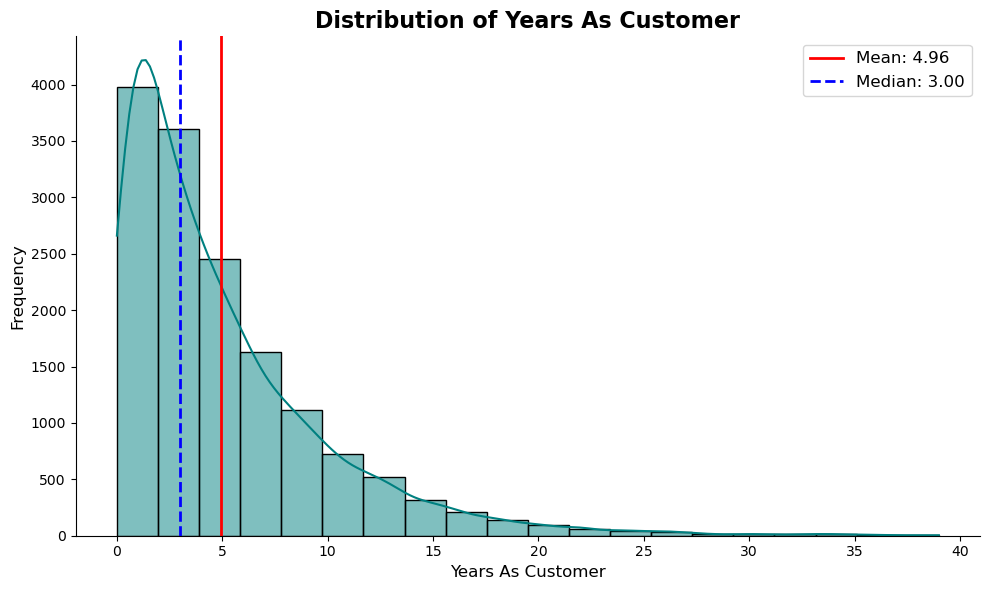

In [14]:
# Plot the histogram for years_as_customer
plot_distribution(product_sales, 'years_as_customer', bins=20, color='teal', kde=True)


The analysis of the `years_as_customer` variable reveals that most customers have been with the company for a relatively short period, with a small group having longer tenures. The mean tenure is 5 years, while the median is 3 years. This indicates a mix of loyal, long-term customers and newer customers, offering opportunities for targeted retention strategies.

### Exploratory Analysis 2: Distribution of Sales Methods

**Question:** What is the Distribution of Sales Methods Used by Customers?

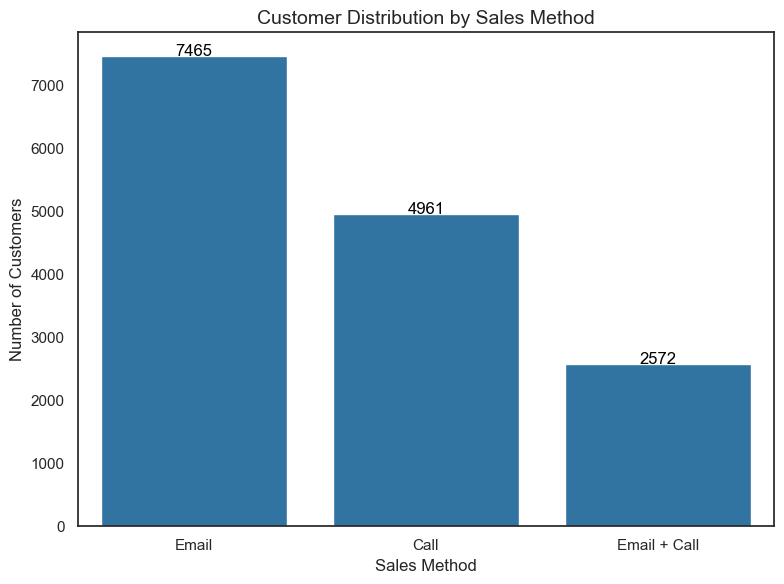

In [15]:
# Call the function to plot customer distribution by sales method
plot_categorical_distribution(
    df=product_sales,             # DataFrame containing the data
    column='sales_method',        # Column name to visualize
    title='Customer Distribution by Sales Method',  # Custom title
    xlabel='Sales Method',        # Custom x-axis label
    ylabel='Number of Customers', # Custom y-axis label
    annotate=True,                 # Annotate the bars with counts
)


The bar chart shows the distribution of customers across different sales approaches. Email is the most effective sales approach, with 7465 customers, followed by phone calls with 4961 customers. The combination of email and phone calls is the least effective, with only 2572 customers.

### **Exploratory Analysis 3: Revenue Distribution Across Sales Methods**

**Question:** How does the distribution of revenue vary across different sales methods (`sales_method`) in the dataset?


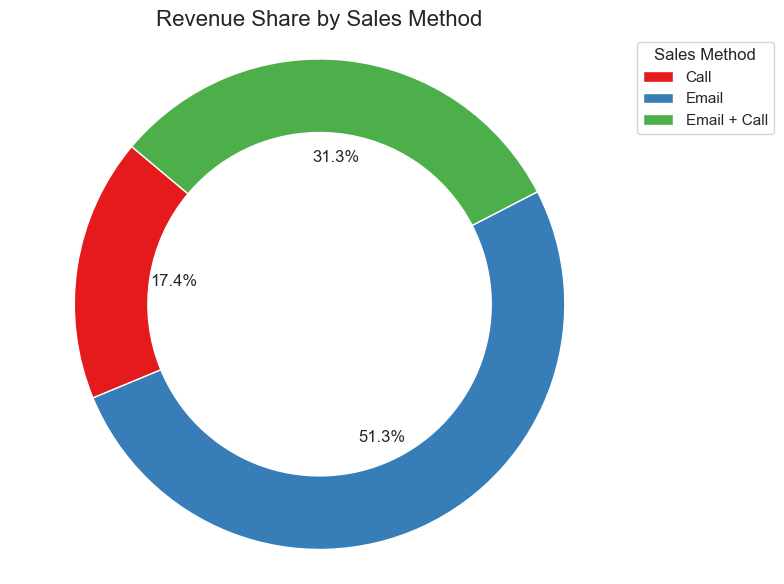

In [16]:
# Plotting revenue distribution by sales method
plot_column_distribution_pie(
    df=product_sales,                             # DataFrame containing customer data
    value_column='revenue',                       # Column for the values (e.g., number of customers)
    category_column='sales_method',               # Column for the categories (e.g., state)
    plot_title='Revenue Share by Sales Method',   # Custom title
    figsize=(8, 6),                               # Custom figure size
    autopct='%1.1f%%'                             # Display percentages as whole numbers
)


- **Email** is the most effective sales method, generating 51.3% of the total revenue.
- **Email + Call** contributes 31.3% of the revenue, showing that a combined approach is also highly impactful.
- **Call** accounts for 17.4% of the revenue, playing a supporting role in the overall strategy.

These insights suggest that email is the dominant channel, while combining email with calls enhances performance, and further strategic adjustments could improve the effectiveness of calls.

### Exploratory Analysis 4: Distribution of Customers Across States

**Question:** How many customers are there in each state?

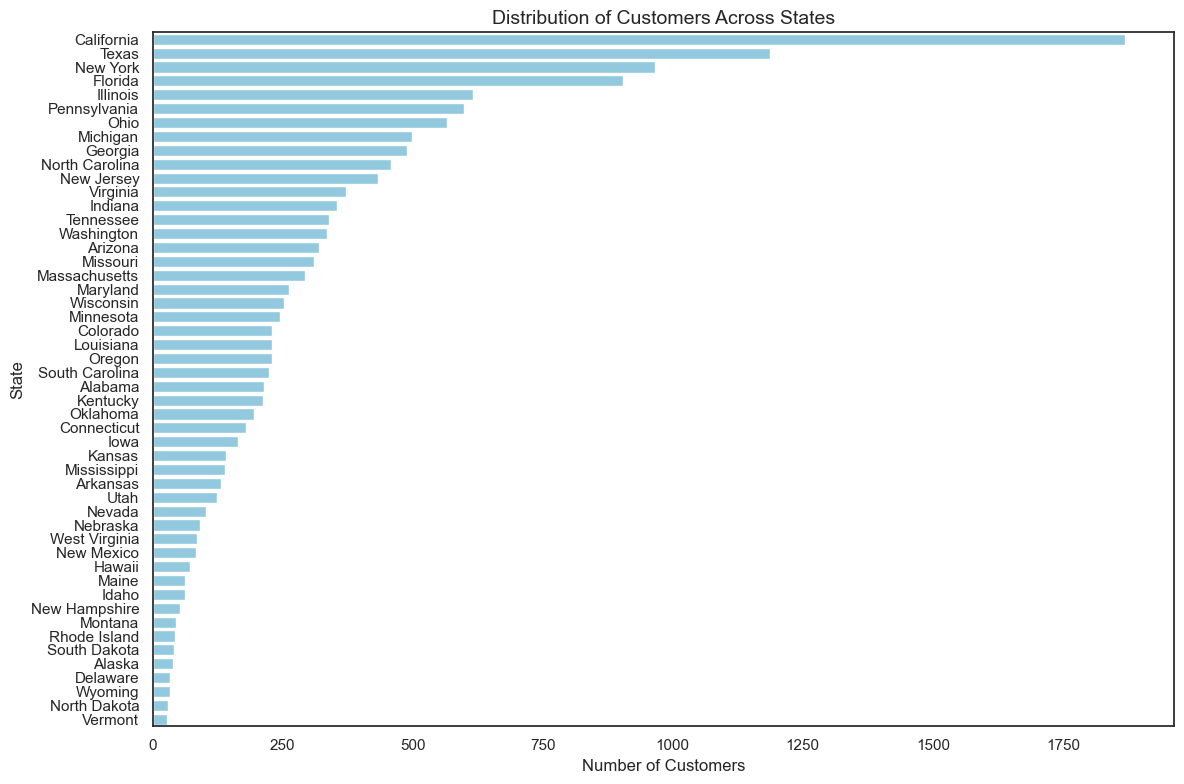

In [17]:
# Visualizes the distribution of customers across states with a horizontal bar chart.

plot_categorical_distribution(
    df=product_sales,             # Your DataFrame
    column='state',               # Categorical column to visualize
    title='Distribution of Customers Across States',  # Custom title
    xlabel='Number of Customers', # Custom x-axis label
    ylabel='State',               # Custom y-axis label
    color='skyblue',              # Fixed color for the bars
    figsize=(12, 8),              # Figure size
    annotate=False,                # No annotation on bars
    orientation='h'
)

The distribution of customers across states shows that a few states dominate the customer base. California, Texas, New York, and Florida are the top four states in terms of customer numbers, collectively accounting for a significant portion of the total customer base. This concentration suggests that these states are key markets, and targeted strategies may be beneficial for customer engagement in these regions.

### **Exploratory Analysis 5: Distribution of Revenue**

**Question:** What is the distribution of revenue (`revenue`) across all transactions in the dataset?

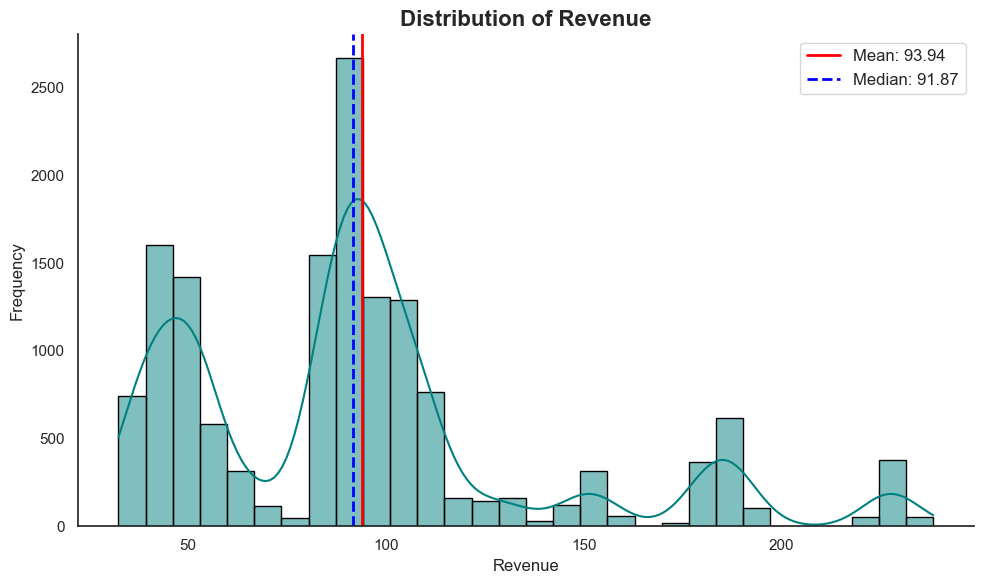

In [18]:
# Plot the histogram for years_as_customer
plot_distribution(product_sales, 'revenue', bins=30, color='teal', kde=True)

The distribution of revenue reveals that the highest sales frequencies occur in the `$50` to `$90` range, with notable peaks at around `$50` and `$90`. This suggests that certain product bundles or pricing points in this range are more popular. On the other hand, there are lower sales frequencies in the ranges around `$70` and above `$120`, which could indicate less popular products or less effective pricing. This insight is valuable for optimizing pricing strategies and inventory management, focusing on the ranges that generate higher revenue.

## Bivariate Exploration

### Exploratory Analysis 6: Relationship Between Site Visits and Product Sales

**Question:**  
How does the number of site visits affect the number of products sold?


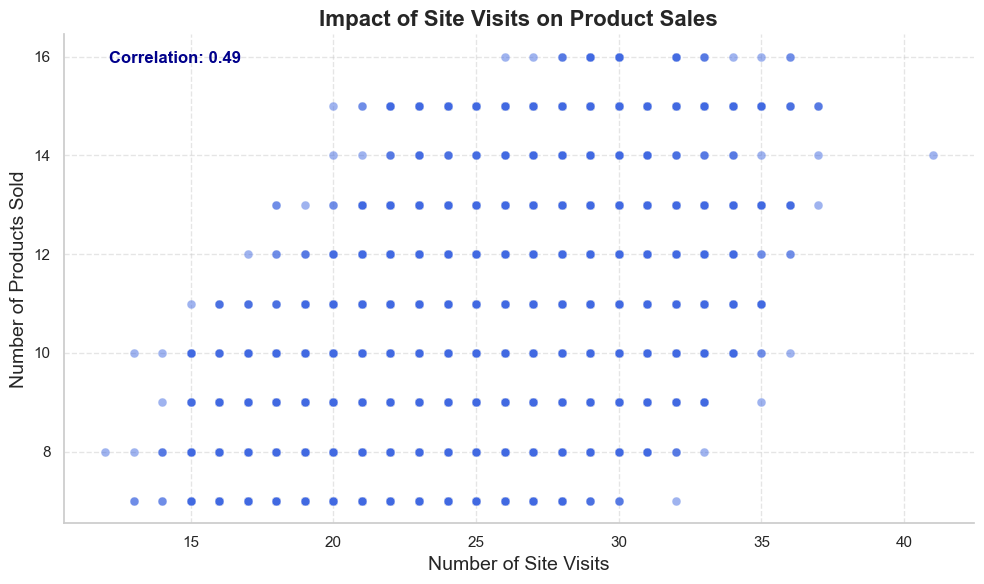

In [19]:
# Calculate correlation coefficient
correlation = product_sales['nb_site_visits'].corr(product_sales['nb_sold'])

# Scatter Plot with Transparency and Jitter (if necessary)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='nb_site_visits',
    y='nb_sold',
    data=product_sales,
    color='royalblue',
    alpha=0.5,      # Transparency to reduce overplotting
    s=40,           # Adjusted marker size for clarity
    edgecolor='w',  # White edge for visibility
    linewidth=0.3)

# Annotation with Correlation Coefficient
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         ha='left', va='center', transform=plt.gca().transAxes, 
         fontsize=12, color='darkblue', fontweight='bold')

# Titles and labels with polished font sizes
plt.title('Impact of Site Visits on Product Sales', fontsize=16, fontweight='bold')
plt.xlabel('Number of Site Visits', fontsize=14)
plt.ylabel('Number of Products Sold', fontsize=14)

# Grid and layout adjustments for polish
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


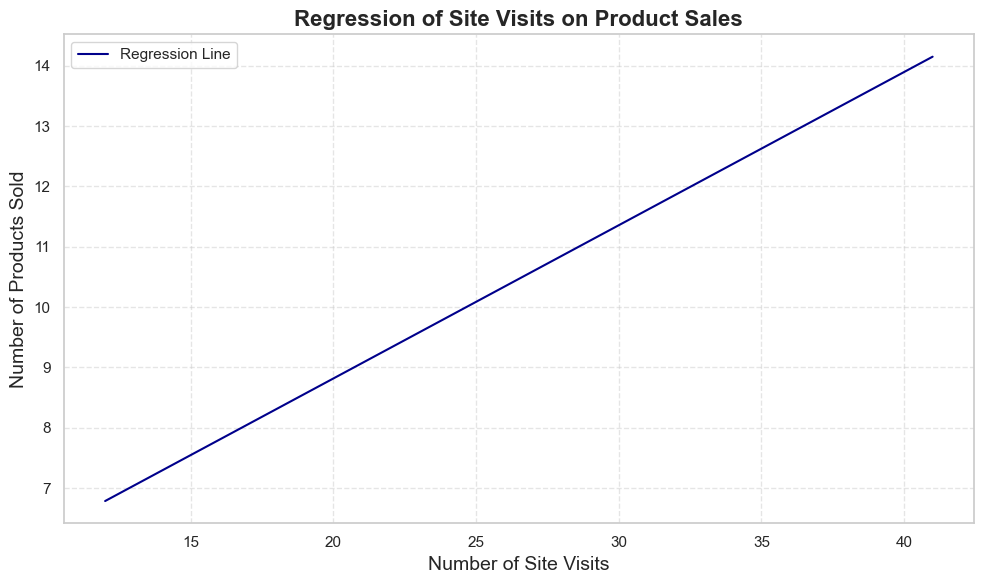

In [20]:
from sklearn.linear_model import LinearRegression


# Prepare data for the model
X = product_sales[['nb_site_visits']].values  # Independent variable
y = product_sales['nb_sold'].values           # Dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions for the line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Range of X for the line
y_pred = model.predict(X_range)

# Plot the regression line without scatter points
plt.figure(figsize=(10, 6))
plt.plot(X_range, y_pred, color='darkblue', linewidth=1.5, label='Regression Line')

# Titles and labels
plt.title('Regression of Site Visits on Product Sales', fontsize=16, fontweight='bold')
plt.xlabel('Number of Site Visits', fontsize=14)
plt.ylabel('Number of Products Sold', fontsize=14)

# Grid and layout adjustments
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Insights

- **Moderate Positive Correlation (0.49)**: The correlation coefficient of 0.49 indicates a moderate positive relationship between site visits and product sales. This means that, in general, increased site visits tend to be associated with higher sales. However, this relationship is not strong enough to make precise predictions about sales based solely on site visits.

- **Sales Trends**: The scatter plot reveals a general trend where more site visits are linked with increased sales. Nevertheless, the variability in the data points suggests that site visits alone do not fully explain sales performance. Other factors are likely influencing sales outcomes.

- **Trend Line Analysis**: The trend line provides a visual guide to the overall relationship between site visits and sales. While it shows a positive trend, it’s important to note that the line represents a general pattern and may not capture all nuances. For more accurate sales forecasting, additional variables and factors should be considered.

### Suggestion

To capitalize on the positive relationship between site visits and sales, consider enhancing the website's effectiveness. Improving the website’s user interface, optimizing it for better performance, and increasing promotional activities could help drive more site visits and, consequently, higher sales. By addressing these areas, you can potentially strengthen the correlation and boost overall revenue.

### Exploratory Analysis 7: Distribution of Revenue by Sales Method

**Question:** How does revenue (`revenue`) vary across different sales methods (`sales_method`)?

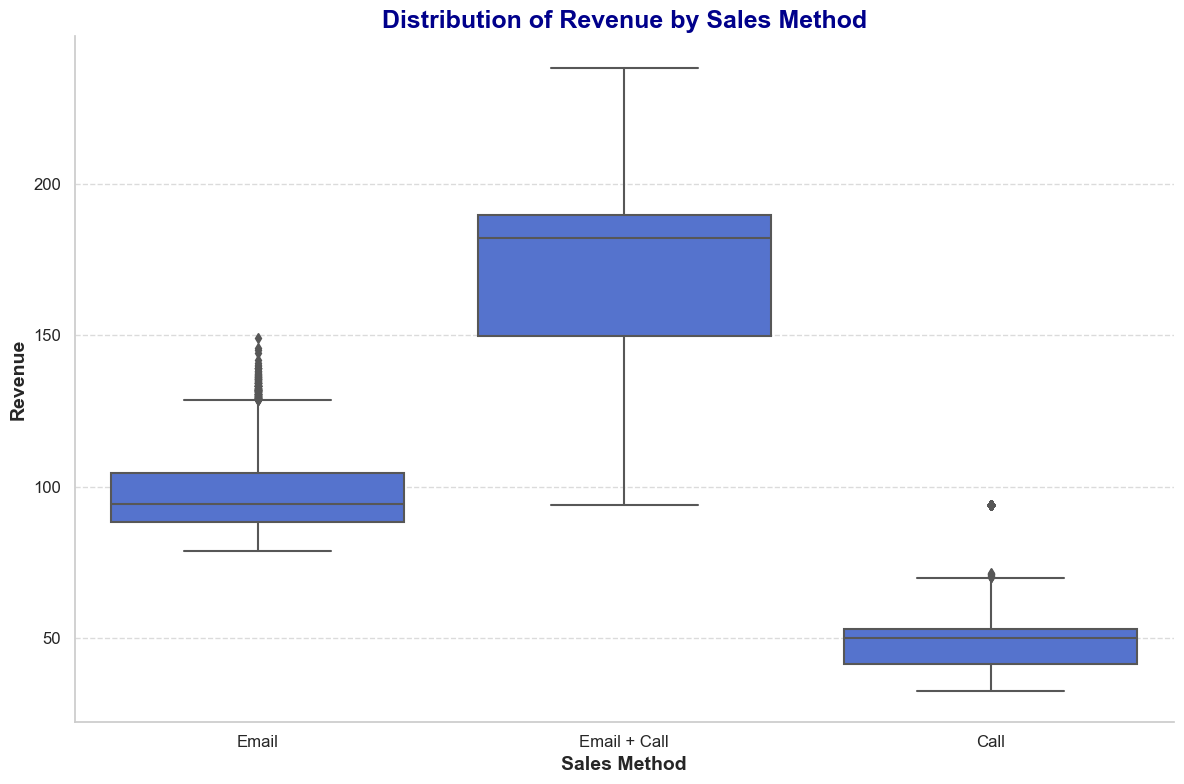

In [21]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Create a boxplot to show the distribution of revenue by sales method with a single color palette
sns.boxplot(data=product_sales, x='sales_method', y='revenue', color='royalblue')

# Add titles and labels with enhanced font styling
plt.title('Distribution of Revenue by Sales Method', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Sales Method', fontsize=14, fontweight='bold')
plt.ylabel('Revenue', fontsize=14, fontweight='bold')

# Customize axis labels and ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines for a cleaner look
sns.despine()

# Display the plot with tight layout
plt.tight_layout()
plt.show()


The boxplot illustrates the distribution of revenue across different sales methods, revealing key patterns in sales performance. Email sales exhibit the lowest median revenue, followed by phone sales, while the combination of both methods leads to the highest median revenue. Despite these differences, there is considerable variability in revenue within each method, as evidenced by the spread of the boxes and the presence of outliers. This indicates that while individual sales methods like email and phone calls contribute to revenue, the combined approach shows a more consistent ability to generate higher revenue, suggesting a potential strategy for optimizing sales performance.

### Exploratory Analysis 8: How Does the Number of Site Visits Relate to the Number of Products Sold?

To understand how site visits impact product sales, we will explore the correlation between the number of site visits and the quantity of products sold. By analyzing this relationship, we aim to uncover insights into how increasing site traffic might influence sales performance. Understanding this connection can help inform marketing strategies and optimize sales tactics for greater business growth.


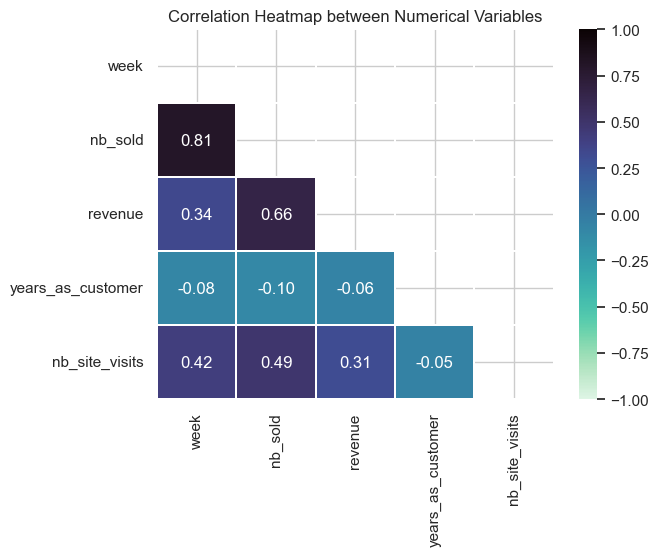

In [22]:
# Calculate the correlation matrix
corr = product_sales.corr(numeric_only=True)

# Create a heatmap to visualize correlations
sns.heatmap(corr, vmin=-1, vmax=1, cmap='mako_r', mask=np.triu(corr), annot=True, fmt='.2f', linecolor='white', linewidth=0.1)

# Set the title for the heatmap
plt.title("Correlation Heatmap between Numerical Variables");

### Insight from the Correlation Matrix:

1. **Site Visits and Sales**:  
   There is a moderate positive correlation (0.49) between **number of site visits** and **number of products sold**. This suggests that as site visits increase, the number of products sold tends to rise, though the relationship is not strong enough to rely solely on site visits to predict sales.

2. **Revenue and Sales**:  
   A strong positive correlation (0.66) exists between **revenue** and **number of products sold**. This is expected, as higher sales directly contribute to higher revenue, making this a clear and direct relationship.

3. **Revenue and Site Visits**:  
   The correlation between **revenue** and **site visits** (0.31) is moderate but positive. While site visits have a role in driving revenue, other factors likely contribute more significantly to revenue generation, such as product pricing or conversion rates.

4. **Years as a Customer**:  
   **Years as a customer** has weak negative correlations with other variables. The correlations with **site visits (-0.05)**, **revenue (-0.06)**, and **number of products sold (-0.10)** are minimal, indicating that customer longevity does not have a strong influence on recent transactional behavior in this dataset. This could suggest that newer customers are contributing significantly to sales, or that loyalty does not guarantee higher revenue or purchases.

### Key Takeaway:
- The most significant relationships are between **number of products sold** and **revenue**, followed by **site visits** and **sales**. 
- **Customer loyalty**, measured by years as a customer, appears to have a limited direct impact on current sales behavior in this dataset.

### Exploratory Analysis 9: Revenue Trends Across Sales Methods and Weeks

**Question:**
How does the revenue generated by different sales methods evolve across weeks?

<Figure size 1200x800 with 0 Axes>

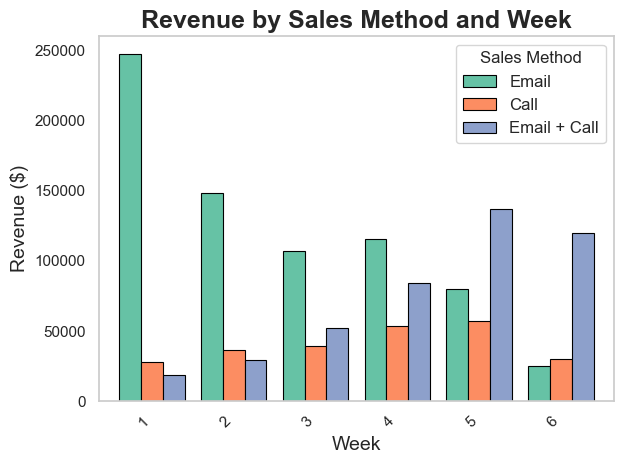

In [23]:
# Define a color palette that is suitable for colorblindness
# Using ColorBrewer's Set2 palette, which is colorblind-friendly
palette = sns.color_palette("Set2", 3)  # 3 colors for the three sales methods

# Group the revenue by `sales_method` and `week`
group_revenue_by_method_week = product_sales.groupby(['sales_method', 'week'])['revenue'].sum().reset_index()

# Pivot the results
revenue_by_method_week = group_revenue_by_method_week.pivot(index='week', columns='sales_method', values='revenue')

# Re-order the columns in the pivot table for consistency
revenue_by_method_week = revenue_by_method_week[['Email', 'Call', 'Email + Call']]

# Create the plot for revenue by sales method and week
plt.figure(figsize=(12, 8))

# Plot the bar chart for revenue by sales method and week
revenue_by_method_week.plot(kind='bar', color=palette, width=0.8, edgecolor='black', linewidth=0.8)

# Set titles, labels, and customize ticks for better readability
plt.title('Revenue by Sales Method and Week', fontsize=18, fontweight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title='Sales Method', title_fontsize=12, fontsize=12)
plt.grid(False)  # Remove gridlines for a cleaner look

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**Email** is dominant in the **first 4 weeks**. After the 4th week, the **combined email and call** approach becomes increasingly effective, and by the **6th week**, it surpasses email as the top-performing sales method. 


## Multivariate Exploration

### Exploratory Analysis 10: Distribution of Sales Methods by State

**Question:** How is the distribution of sales methods (`sales_method`) across the top 10 states in terms of customer count?

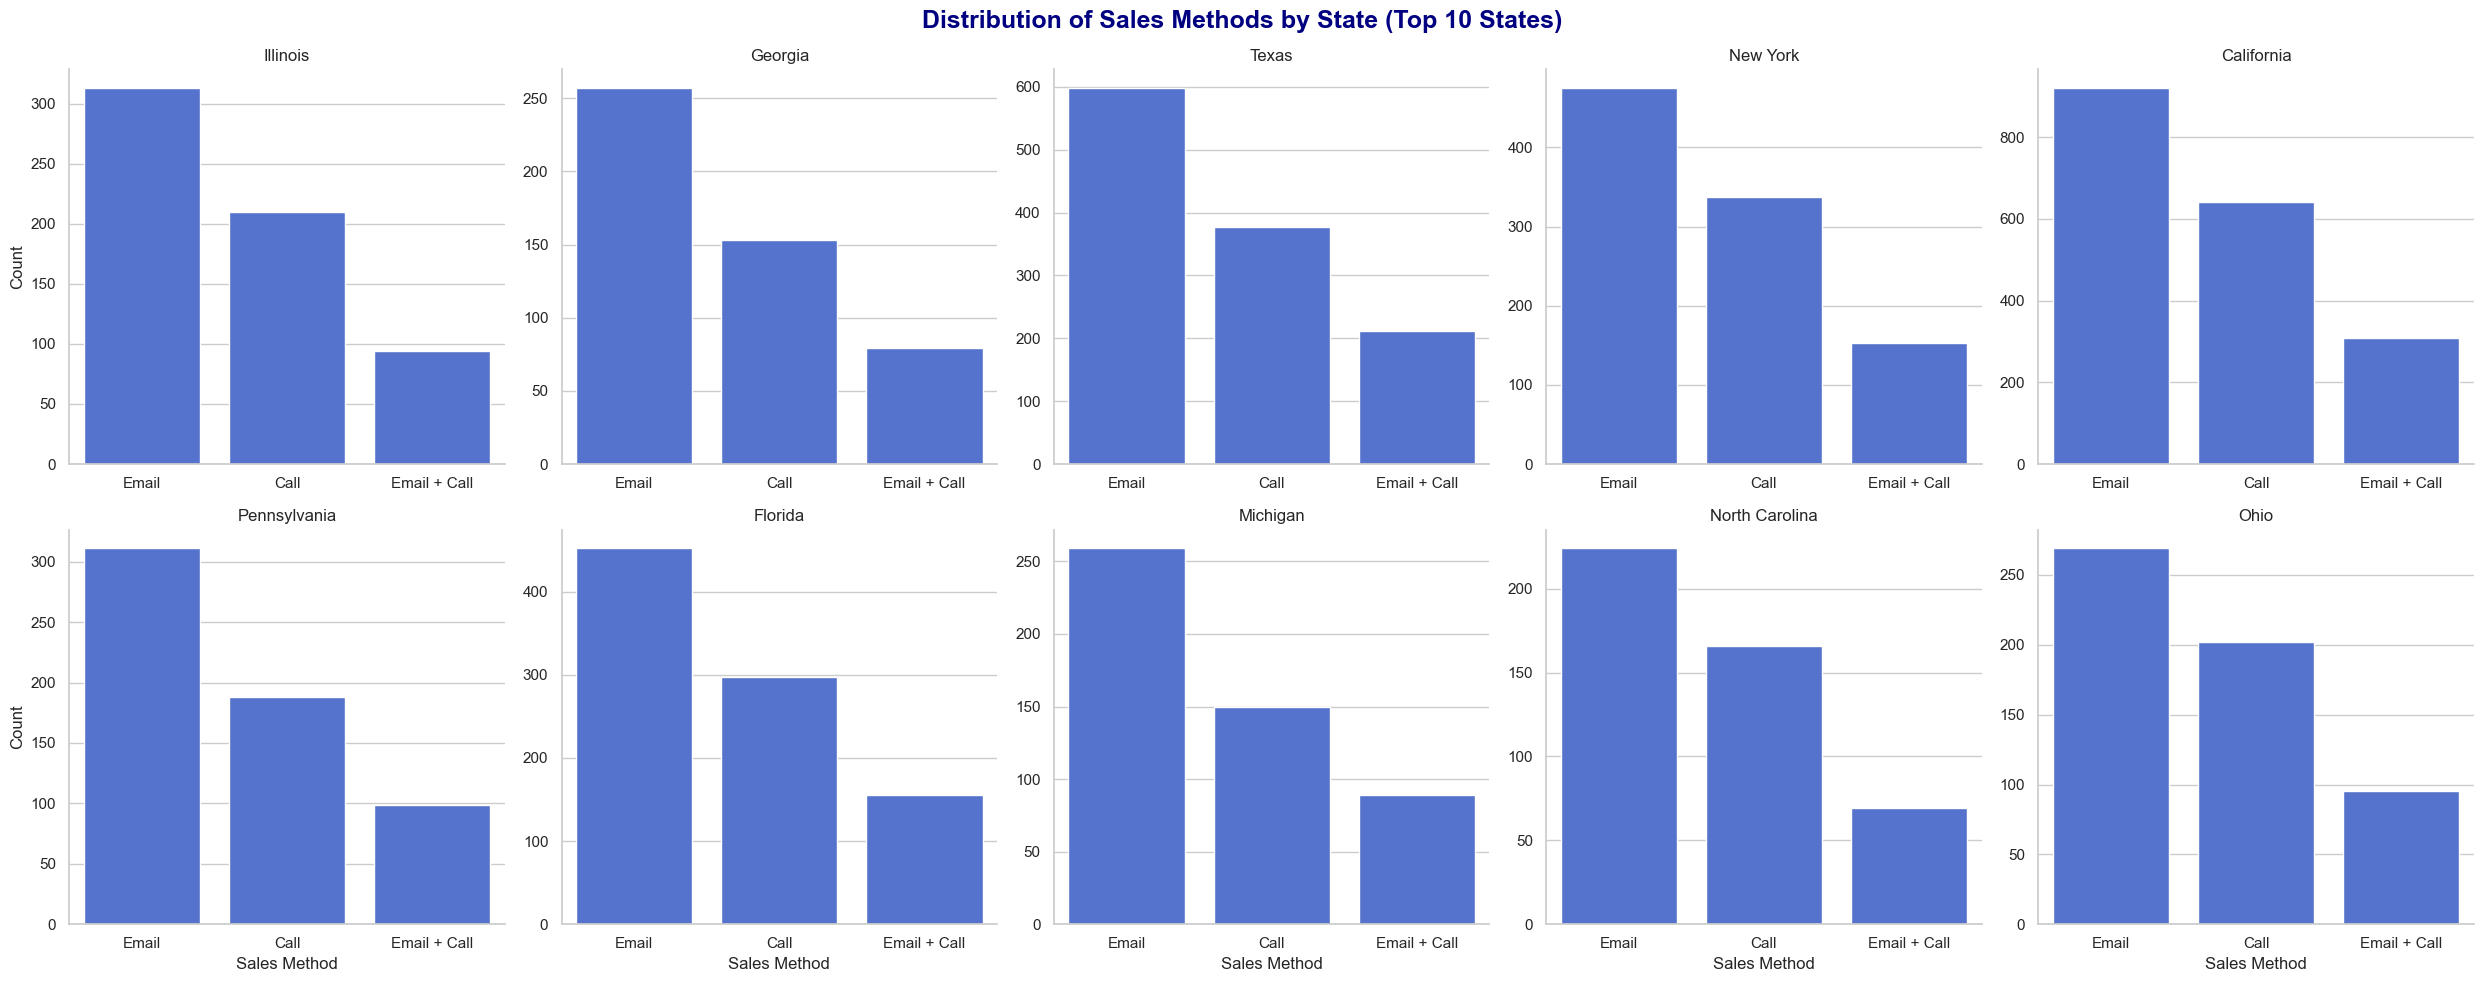

In [24]:
# Get the top 10 states by number of customers
top_10_states = product_sales['state'].value_counts().index[:10]

# Filter the dataset for top 10 states
top_10_sales_data = product_sales[product_sales['state'].isin(top_10_states)]

# Get the unique sales methods in the correct order
sales_method_order = product_sales['sales_method'].value_counts().index

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the FacetGrid with increased size and better layout
g = sns.FacetGrid(top_10_sales_data, col="state", col_wrap=5, height=5, sharex=False, sharey=False)

# Map the countplot to each facet with an explicit order for sales_method
g.map(sns.countplot, "sales_method", order=sales_method_order, color='royalblue')

# Set the titles and labels with improved font styling
g.set_axis_labels("Sales Method", "Count", fontsize=12)
g.set_titles("{col_name}", fontsize=14)

# Add a main title for the entire grid
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Sales Methods by State (Top 10 States)', fontsize=18, fontweight='bold', color='navy')

# Display the plot with a tighter layout for better readability
plt.tight_layout()
plt.show()


Across all top 10 states, email consistently emerges as the preferred sales method. This underscores the power of email as a reliable and effective channel for customer engagement and conversion.

### Exploratory Analysis 11: Revenue Trends by Sales Method

**Question:** What do the revenue trends reveal about our sales methods?

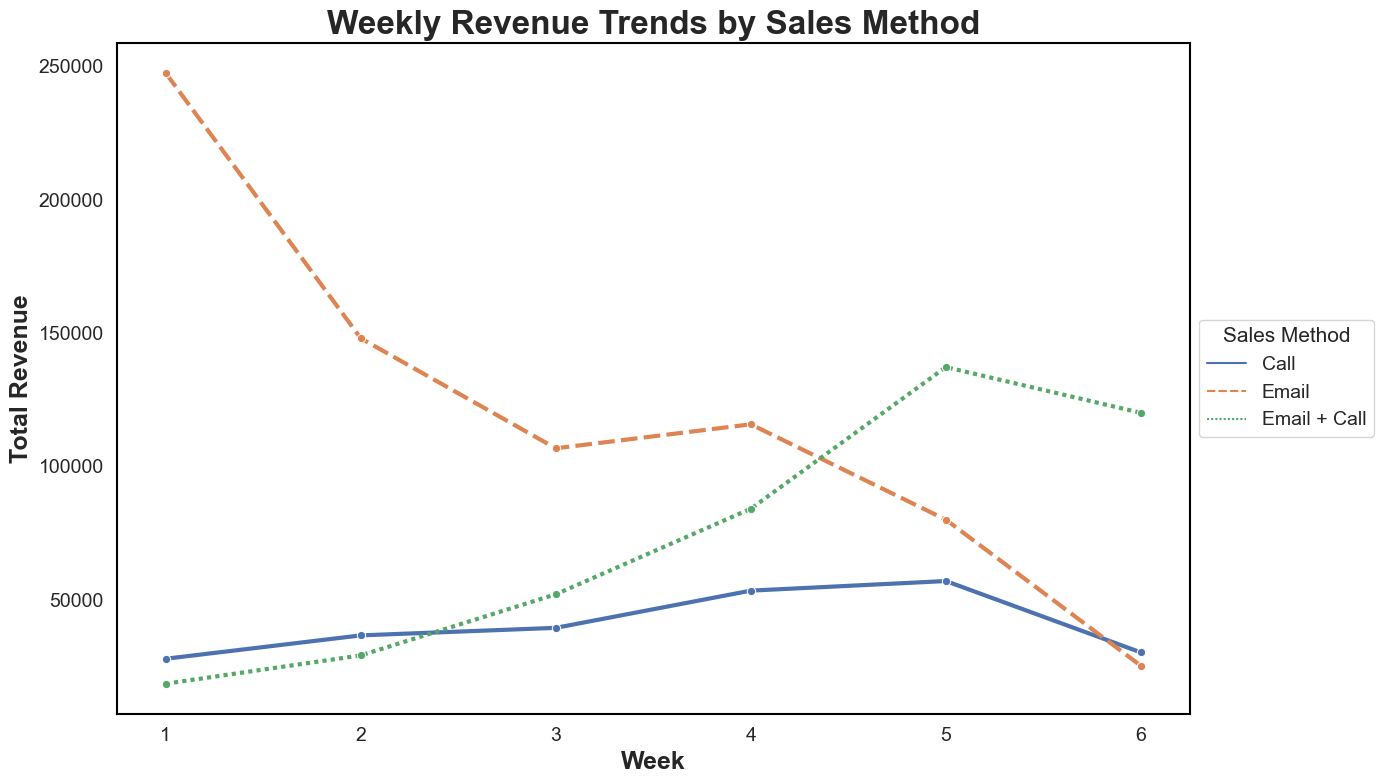

In [25]:
# Set the Seaborn style for a cleaner look
sns.set_theme(style="white")  # Use 'white' for no grid lines

# Grouping data by week and sales method to calculate total revenue per method per week
revenue_over_time = product_sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Creating the line plot for weekly revenue trends
plt.figure(figsize=(14, 8))

# Using a more vibrant and professional color palette and bold lines
sns.lineplot(data=revenue_over_time, x='week', y='revenue', hue='sales_method', 
             marker='o', palette='deep', linewidth=3, style='sales_method')

# Enhancing the title and labels with larger font sizes
plt.title('Weekly Revenue Trends by Sales Method', fontsize=24, fontweight='bold')
plt.xlabel('Week', fontsize=18, fontweight='bold')
plt.ylabel('Total Revenue', fontsize=18, fontweight='bold')

# Customizing the y-axis ticks for better clarity
plt.yticks(fontsize=14)  # Increase font size for y-axis ticks
plt.xticks(range(product_sales['week'].min(), product_sales['week'].max() + 1), fontsize=14)

# Adding black borders to the figure
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1.5)

# Positioning the legend on the right and adjusting its style
plt.legend(title='Sales Method', title_fontsize='15', fontsize='14', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Display the plot
plt.show()

The chart illustrates the revenue trends over a six-week period for the three sales methods: Call, Email, and Email + Call.

- **Overall Revenue Performance**: A downward trend in total revenue over the six weeks suggests a need to reassess sales strategies and market conditions after an initial boost in Week 1.
  
- **Email**: Peaked in Week 1 but experienced a sharp decline in Weeks 2 and 3, indicating a need for follow-up strategies to maintain momentum.

- **Call**: Consistently underperformed, contributing the least to revenue, suggesting that calls alone may not be the most effective sales method.

- **Email + Call**: Demonstrated steady growth and surpassed the other methods by Week 6, highlighting the value of a combined approach for sustained revenue generation.

In summary, focusing on the Email + Call method appears to be the most effective strategy, while further optimization of the Email method and reassessment of the Call strategy could improve overall performance.

### Exploratory Analysis 12:Impact of Sales Method on Revenue and Product Sales

**Question:** How does the choice of sales method affect the number of products sold and the generated revenue?

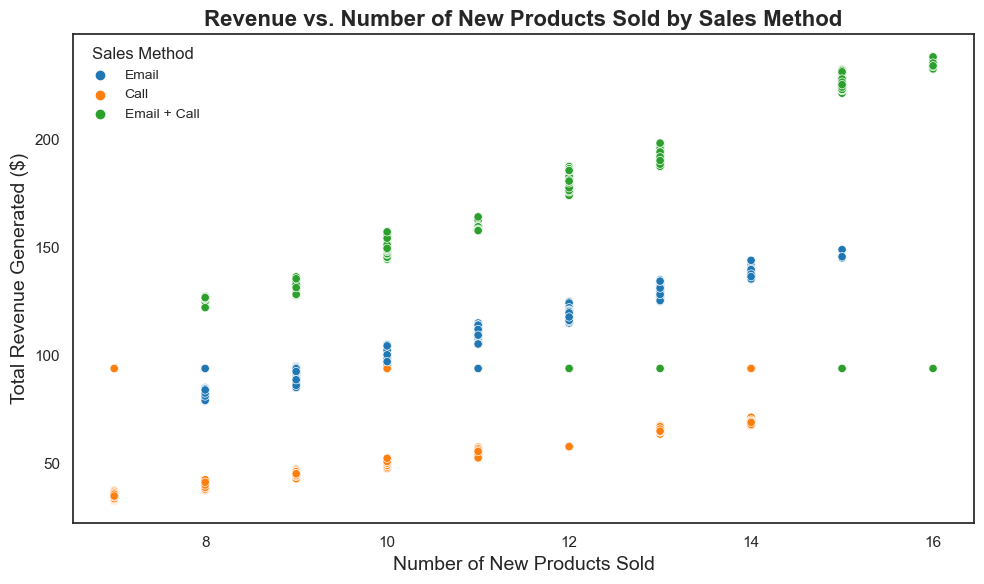

In [26]:
# Define a colorblind-friendly color palette
palette = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Use ColorBrewer colors or any suitable palette

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjusted figure size for better clarity
sns.scatterplot(
    data=product_sales,
    x='nb_sold', 
    y='revenue', 
    hue='sales_method',
    palette=palette,
    hue_order=['Email', 'Call', 'Email + Call'],  # Ensure correct order in legend
)

# Title and improved axis labels
plt.title("Revenue vs. Number of New Products Sold by Sales Method", fontsize=16, fontweight='bold')
plt.xlabel('Number of New Products Sold', fontsize=14)
plt.ylabel('Total Revenue Generated ($)', fontsize=14)

# Improve readability of the legend
plt.legend(title='Sales Method', title_fontsize=12, fontsize=10, loc='upper left', frameon=False)

# Adjust layout for a professional look
plt.tight_layout()

# Display the plot
plt.show()


### Saving the Cleaned Dataset

After performing the necessary exploratory analysis and data cleaning, we will save the final version of the dataset as a cleaned CSV file.

In [27]:
# Saving the cleaned product_sales dataframe to a CSV file
product_sales.to_csv('cleaned_product_sales.csv', index=False)

This code will export the `product_sales` DataFrame to a CSV file named `cleaned_product_sales.csv` in the current working directory, without including the index column.

### Conclusion: Key Insights from Data Exploration

In this analysis, we explored various aspects of the sales data, focusing on customer tenure, sales methods, revenue distribution, and other critical patterns. Below is a summary of the key findings:

1. **Customer Tenure Distribution**:
   - The majority of customers are relatively new, with a smaller proportion having been customers for several years. This insight suggests potential for increasing customer retention efforts.

2. **Sales Methods Distribution**:
   - Email emerged as the most popular sales method, followed by a combination of email and calls. Calls alone showed a relatively lower contribution to overall sales, indicating room for improvement in call-based strategies.

3. **Revenue Distribution Across Sales Methods**:
   - Email accounted for the largest share of revenue, followed by Email + Call, which demonstrated steady growth over time. This highlights the effectiveness of combining sales strategies for sustained revenue generation.

4. **Customer Distribution by State**:
   - A small number of states (California, Texas, New York, and Florida) dominated the customer base, indicating a concentrated customer distribution. This could suggest opportunities for regional marketing or targeted campaigns in less represented states.

5. **Revenue Distribution**:
   - The revenue distribution showed a concentration in the lower ranges, with a few high-revenue transactions. This suggests that while most transactions are relatively small, there are occasional high-value sales that significantly impact total revenue.

6. **Number of Products Sold and Revenue**:
   - A moderate positive correlation was found between the number of products sold and revenue. This suggests that selling more products generally leads to higher revenue, although other factors likely contribute to revenue generation.

7. **Sales Method Performance by Revenue**:
   - The combined Email + Call method performed best in sustaining revenue over time, whereas Email alone showed a sharp decline after initial success, and Call showed consistent underperformance. This indicates that a multi-channel approach is likely more effective.

8. **Sales Methods by State**:
   - There were notable regional differences in the use of sales methods, with some states relying more heavily on Email and others on combinations of Email + Call. This may present an opportunity to refine sales strategies by region.

9. **Revenue Trends by Sales Method**:
   - The revenue trends over time revealed that while Email had an initial strong performance, its impact diminished, whereas Email + Call showed consistent growth. This suggests the need to further invest in or expand multi-channel strategies to maintain or boost revenue.

### Reflection on the Data Exploration Steps:

- Throughout the exploratory analysis, we focused on visualizing key metrics and identifying trends, which allowed for better insights into the relationship between sales methods, revenue, and customer demographics.
- The analysis also revealed areas for improvement, particularly with call-based strategies and customer retention efforts.
- Moving forward, the insights from this exploration will be critical in informing decisions about sales strategies, regional targeting, and customer engagement tactics.

In conclusion, the exploration provided valuable insights into the sales process, customer behavior, and the effectiveness of different sales methods, laying the groundwork for more in-depth analysis and strategic decisions in the future.